# Example of Lyman alpha spectra 2D modeling

You will need Ly_alpha_sim.py to run this notebook. You can remove all the seaborn stuff if you want, this is just used for plotting. 

In [1]:
from Ly_alpha_sim import Lyalpha_sim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1, as_cmap=True)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


These are all the input files needed. Make sure the reference catalog is an ascii file, I need to add in a way to work with fits files later. The flt file should be the grism flt with the PA you're interested in. More information on the files needed is in the Ly_alpha_sim.py comments.

In [2]:
grism_input='../../../Clear_data/flt_files/icxt30s0q_flt.fits'
reference_image='../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.0.F125W_orig_sci.fits'
segment_map='../../../Desktop/catalogs_for_CLEAR/products/goodss_3dhstP.seg.fits'  
ref_cat='../../../Desktop/catalogs_for_CLEAR/products/goodss_3dhstP.cat'

The inputs for Lyalpha_sim are magnitude, equivalent width, redshift, flt file, mosaic, segmentation map, reference catalog, and galaxy id. This is one of my galaxies I chose to model with differenct input magnitueds and equilvalent widths. 

In [14]:
lya = Lyalpha_sim(25,50,7.0,grism_input,reference_image,segment_map,ref_cat,40597)
lya2 = Lyalpha_sim(27,100,7.0,grism_input,reference_image,segment_map,ref_cat,40597)

Image cutout: x=slice(6340, 10445, None), y=slice(12710, 16937, None)
Using default C-based coordinate transformation...
Image cutout: x=slice(6340, 10445, None), y=slice(12710, 16937, None)
../../../Clear_data/flt_files/icxt30s0q_flt.fits / Pad ref HDU with 50 pixels
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Image cutout: x=slice(6340, 10445, None), y=slice(12710, 16937, None)
Using default C-based coordinate transformation...
Image cutout: x=slice(6340, 10445, None), y=slice(12710, 16937, None)
../../../Clear_data/flt_files/icxt30s0q_flt.fits / Pad ref HDU with 50 pixels
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...


These are the models used for the simulations.

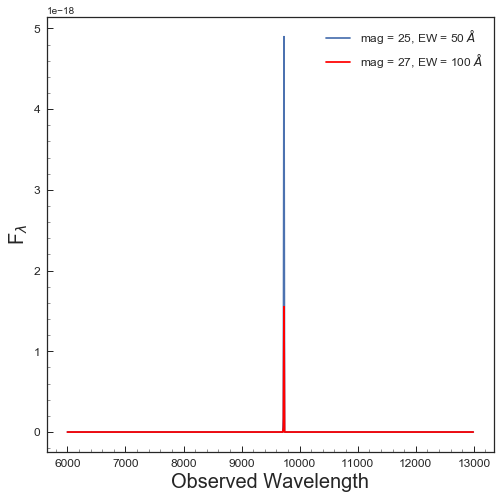

In [15]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(lya.wv_range,lya.lya_dist,label = 'mag = 25, EW = 50 $\AA$')
plt.plot(lya2.wv_range,lya2.lya_dist,'r',label = 'mag = 27, EW = 100 $\AA$')
plt.xlabel('Observed Wavelength',fontsize=20)
plt.ylabel('F$_\lambda$',fontsize=20)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize = 12)
plt.show()
plt.close()

Here are the 2D simulated spectra. I've added the noise to it just to show how the different magnitudes affect it. I'm not show how close this is to the real noise in the data. 

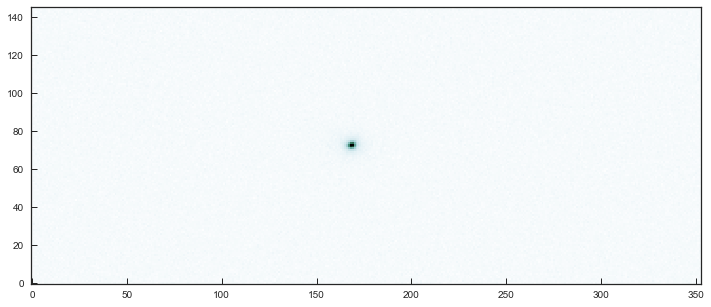

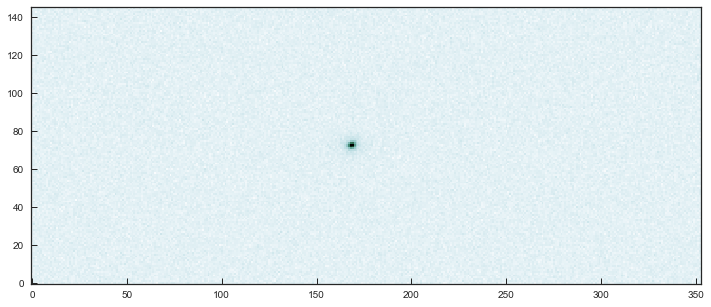

In [16]:
noise = np.random.normal(0,10**(-19),lya.sim_2D.shape)

plt.figure(figsize=[12,8])
plt.imshow(lya.sim_2D+noise, interpolation='Nearest', origin='lower', cmap=colmap)
plt.show()
plt.close()

plt.figure(figsize=[12,8])
plt.imshow(lya2.sim_2D+noise, interpolation='Nearest', origin='lower', cmap=colmap)
plt.show()
plt.close()


In [17]:
lya.Extract_1D()
lya2.Extract_1D()

Here are the 1D extractions from the simulations.

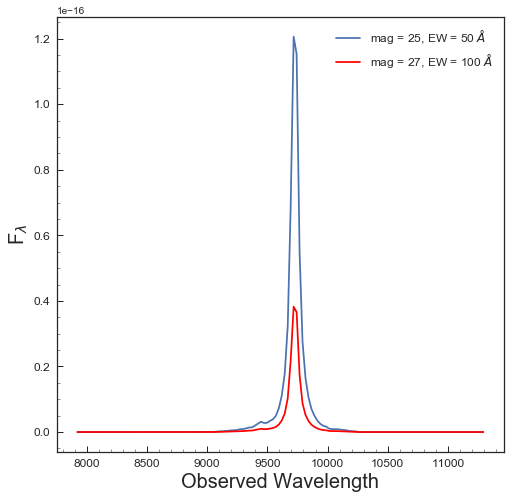

In [18]:
plt.figure(figsize=[8,8])
plt.plot(lya.wave_1D,lya.flux_1D,label = 'mag = 25, EW = 50 $\AA$')
plt.plot(lya2.wave_1D,lya2.flux_1D, 'r',label = 'mag = 27, EW = 100 $\AA$')
plt.xlabel('Observed Wavelength',fontsize=20)
plt.ylabel('F$_\lambda$',fontsize=20)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize = 12)
plt.show()
plt.close()